In [1]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np




In [4]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [6]:
transform_train=transforms.Compose([
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])

transform_test=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),
                         (0.5,0.5,0.5))
])

trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                      download=True,transform=transform_train)
trainloader=DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)

testset=torchvision.datasets.CIFAR10(root='./data',train=False,
                                     download=True,transform=transform_test)
testLoader=DataLoader(testset,batch_size=100,shuffle=False,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')




100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]


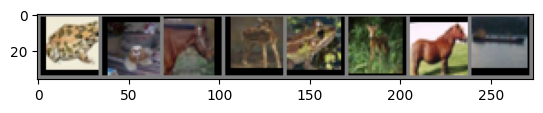

 frog   dog horse  deer  frog  deer horse  ship


In [8]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()


dataiter=iter(trainloader)
images,labels=next(dataiter)

imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


In [22]:
class CIFAR10Model(nn.Module):
  def __init__(self):
    super(CIFAR10Model,self).__init__()

    self.conv1=nn.Conv2d(3,32,3,padding=1)
    self.conv2=nn.Conv2d(32,64,3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.conv3=nn.Conv2d(64,128,3,padding=1)


    self.fc1=nn.Linear(128*8*8,256)
    self.fc2=nn.Linear(256,10)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=x.view(x.size(0),-1)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x

In [23]:
model=CIFAR10Model().to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


In [24]:
EPOCHS=10

for epoch in range(EPOCHS):
  running_loss=0.0
  for i,(inputs,labels) in enumerate(trainloader,0):
    inputs,labels=inputs.to(device),labels.to(device)

    optimizer.zero_grad()

    outputs=model(inputs)

    loss=criterion(outputs,labels)

    loss.backward()

    optimizer.step()

    running_loss+=loss.item()
    if i%100==99:
      print(f"[Epoch {epoch+1},Batch {i+1}] loss:{running_loss/100:.3f}")
      running_loss=0.0

print("Training Finished")


[Epoch 1,Batch 100] loss:1.852
[Epoch 1,Batch 200] loss:1.529
[Epoch 1,Batch 300] loss:1.409
[Epoch 2,Batch 100] loss:1.211
[Epoch 2,Batch 200] loss:1.123
[Epoch 2,Batch 300] loss:1.067
[Epoch 3,Batch 100] loss:0.972
[Epoch 3,Batch 200] loss:0.967
[Epoch 3,Batch 300] loss:0.939
[Epoch 4,Batch 100] loss:0.867
[Epoch 4,Batch 200] loss:0.840
[Epoch 4,Batch 300] loss:0.826
[Epoch 5,Batch 100] loss:0.778
[Epoch 5,Batch 200] loss:0.757
[Epoch 5,Batch 300] loss:0.746
[Epoch 6,Batch 100] loss:0.724
[Epoch 6,Batch 200] loss:0.705
[Epoch 6,Batch 300] loss:0.698
[Epoch 7,Batch 100] loss:0.653
[Epoch 7,Batch 200] loss:0.664
[Epoch 7,Batch 300] loss:0.674
[Epoch 8,Batch 100] loss:0.623
[Epoch 8,Batch 200] loss:0.625
[Epoch 8,Batch 300] loss:0.648
[Epoch 9,Batch 100] loss:0.599
[Epoch 9,Batch 200] loss:0.603
[Epoch 9,Batch 300] loss:0.606
[Epoch 10,Batch 100] loss:0.577
[Epoch 10,Batch 200] loss:0.574
[Epoch 10,Batch 300] loss:0.563
Training Finished


In [25]:
correct=0;
total=0
model.eval()

with torch.no_grad():
  for images,labels in testLoader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f"Accuracy on 10000 test images:{100* correct/total:.2f}%")

Accuracy on 10000 test images:79.83%


In [26]:
class_correct=[0]*10
class_total=[0]*10

with torch.no_grad():
  for images,labels in testLoader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    c=(predicted==labels).squeeze()

    for i in range(len(labels)):
       label = labels[i]
       class_correct[label] += c[i].item()
       class_total[label] += 1

for i in range(10):
    print(f"Accuracy of {classes[i]} : {100 * class_correct[i] / class_total[i]:.2f}%")


Accuracy of plane : 80.40%
Accuracy of car : 92.20%
Accuracy of bird : 68.70%
Accuracy of cat : 64.50%
Accuracy of deer : 66.80%
Accuracy of dog : 69.90%
Accuracy of frog : 88.00%
Accuracy of horse : 87.00%
Accuracy of ship : 93.30%
Accuracy of truck : 87.50%


In [27]:
from google.colab import files
from PIL import Image
import torchvision.transforms as transforms
import torch

uploaded=files.upload()

filename=list(uploaded.keys())[0]

img=Image.open(filename)
img.show()

Saving truck.jpg to truck.jpg


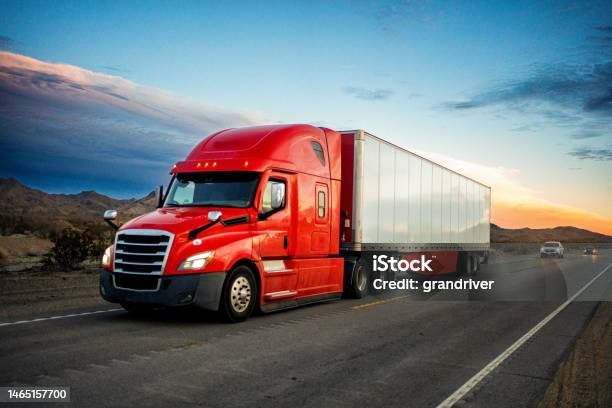

In [28]:
img

In [37]:
from PIL import Image
import torchvision.transforms as transforms
import torch

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

img = Image.open("truck.jpg")
img_tensor = transform(img)

img_tensor = img_tensor.unsqueeze(0)

img_tensor = img_tensor.to(device)

# Prediction
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

print("Predicted class:", predicted.item())
predictedLabel=classes[predicted.item()]
print("Predicted class:", predictedLabel)


Predicted class: 9
Predicted class: truck


In [38]:
torch.save(model.state_dict(),"cifar10_cnn.pth")
print("Model Saved")

Model Saved


In [39]:
!pip freeze > requirements.txt